# IRIS Spectra




In [34]:
!pip install -U tqdm
!pip install -U numpy
!pip install -U matplotlib 
!pip install -U Pillow
!pip install -U pandas
!pip install -U sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached scikit_learn-0.24.2-cp38-cp38-macosx_10_13_x86_64.whl (7.2 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
     |████████████████████████████████| 32.6 MB 716 kB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=9f0c1f4f8719f4f3c9691964f5dcc77742462198b5979032815854670fd4853a
  Stored in directory: /Users/martinm/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


## Download of Data

For this demo case, we use a subset of the IRIS spectra.

Actually, we prepared three different subsets of different size and containing a different number of spectra:
* 20k spectra
* 100k spectra
* 1M spectra

Can be downloaded from https://www.cs.technik.fhnw.ch/iris/sample_data/.

In [ ]:
!mkdir -p ./iris
!curl -L https://www.cs.technik.fhnw.ch/iris/sample_data/iris_sample_spectra_20000.npz > iris_sample_spectra_20000.npz
!unzip -q -o iris_sample_spectra_20000.npz -d ./iris
!rm -f iris_sample_spectra_20000.npz

In [1]:
DATADIR = "./iris"

In [42]:
import os
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans

In [36]:
X_train = np.load(os.path.join(DATADIR, 'X_train.npy')).squeeze()
X_test = np.load(os.path.join(DATADIR, 'X_test.npy')).squeeze()
y_train = np.load(os.path.join(DATADIR, 'y_train.npy'))
y_test = np.load(os.path.join(DATADIR, 'y_test.npy'))

In [37]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20000, 240) (20000,) (20000, 240) (20000,)


The spectra come as the intensity values for 240 channels covering the wavelength range 2794.14-2805.72 Angstroms.

Furthermore, the data are labeled with status information about the sun at the time of collecting the data:

Quite Sun (QS), Sun Spot (SS), Active Region (AR), Pre-Flare (PF) and Flare (FL). 

The Pre-Flare state indicates that the sun will be in Flare state in the next 25min.

The Flare state is characterized by having at least a M-class flare.

In [38]:
set(y_train)

{'AR', 'FL', 'PF', 'QS', 'SS'}

## Data Exploration

Lets plot a few examples - the frequency domain is in a range of of the MagII line which is of some interest for studying the dynamics of the solar atmosphere.

In [39]:
import matplotlib.pyplot as plt

#### Plot some sample spectra

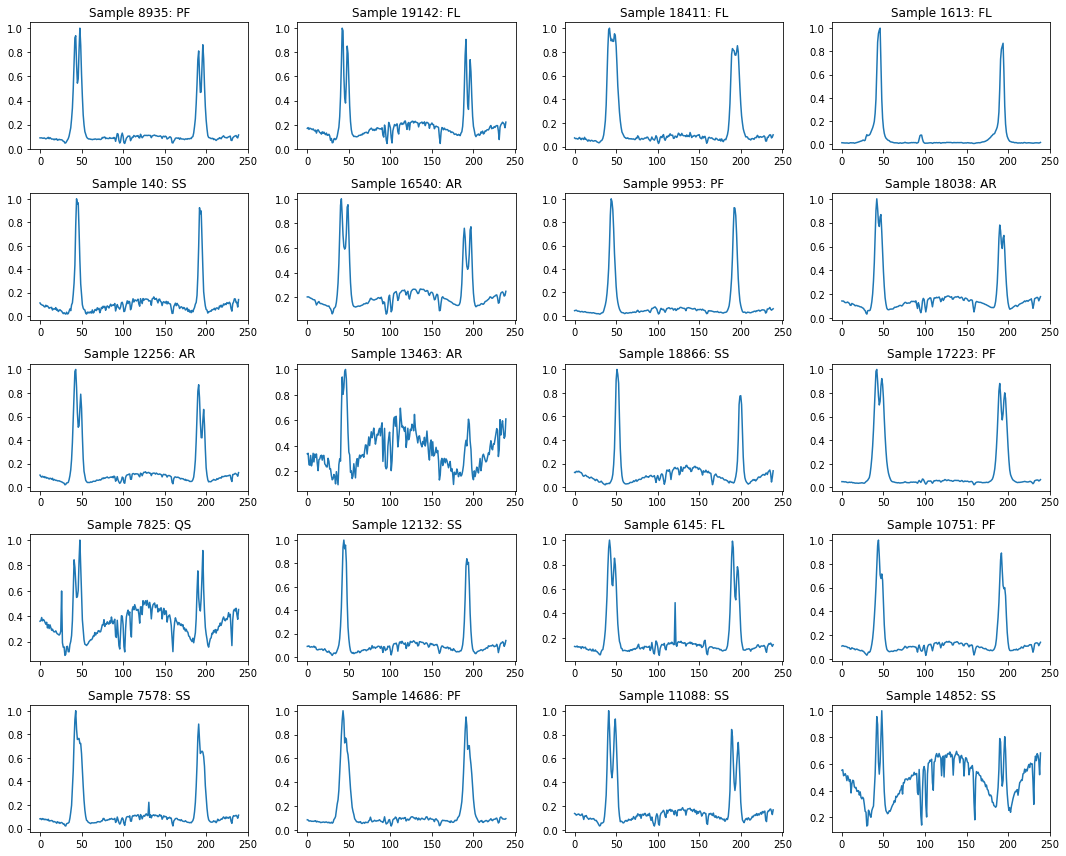

In [40]:
nsamples = 20

samples = [np.random.choice(X_train.shape[0]) for i in range(nsamples)]

ncols = 4
nrows = int(20/ncols) + (0 if nsamples % ncols == 0 else 1)
plt.figure( figsize=(nrows*3,ncols*3) )
i = 0
for r in range(nrows):
    for c in range(ncols):
        sample = samples[i]
        plt.subplot( nrows, ncols, i+1 )
        plt.title( "Sample %i: %s"%(sample, y_train[sample]))
        plt.plot( np.arange(240), X_train[sample])
        i += 1
plt.tight_layout()

## Perform a k-means clustering for characterizing the spectra

In [58]:
ks = np.array([3,5,10,15,20,30,50,75,100])
distances_train = []
distances_test = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
    distances_train.append(kmeans.inertia_)
    distances_test.append((np.min(kmeans.transform(X_test), axis=1)**2).sum())


Text(0.5, 0, 'k')

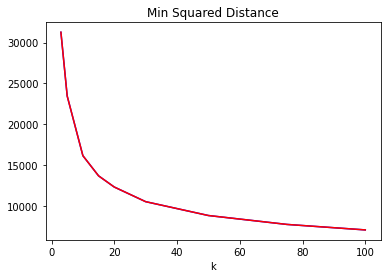

In [60]:
plt.plot(ks, distances_train, 'b')
plt.plot(ks, distances_train, 'r')
plt.title("Min Squared Distance")
plt.xlabel("k")

In [61]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
labels = kmeans.labels_

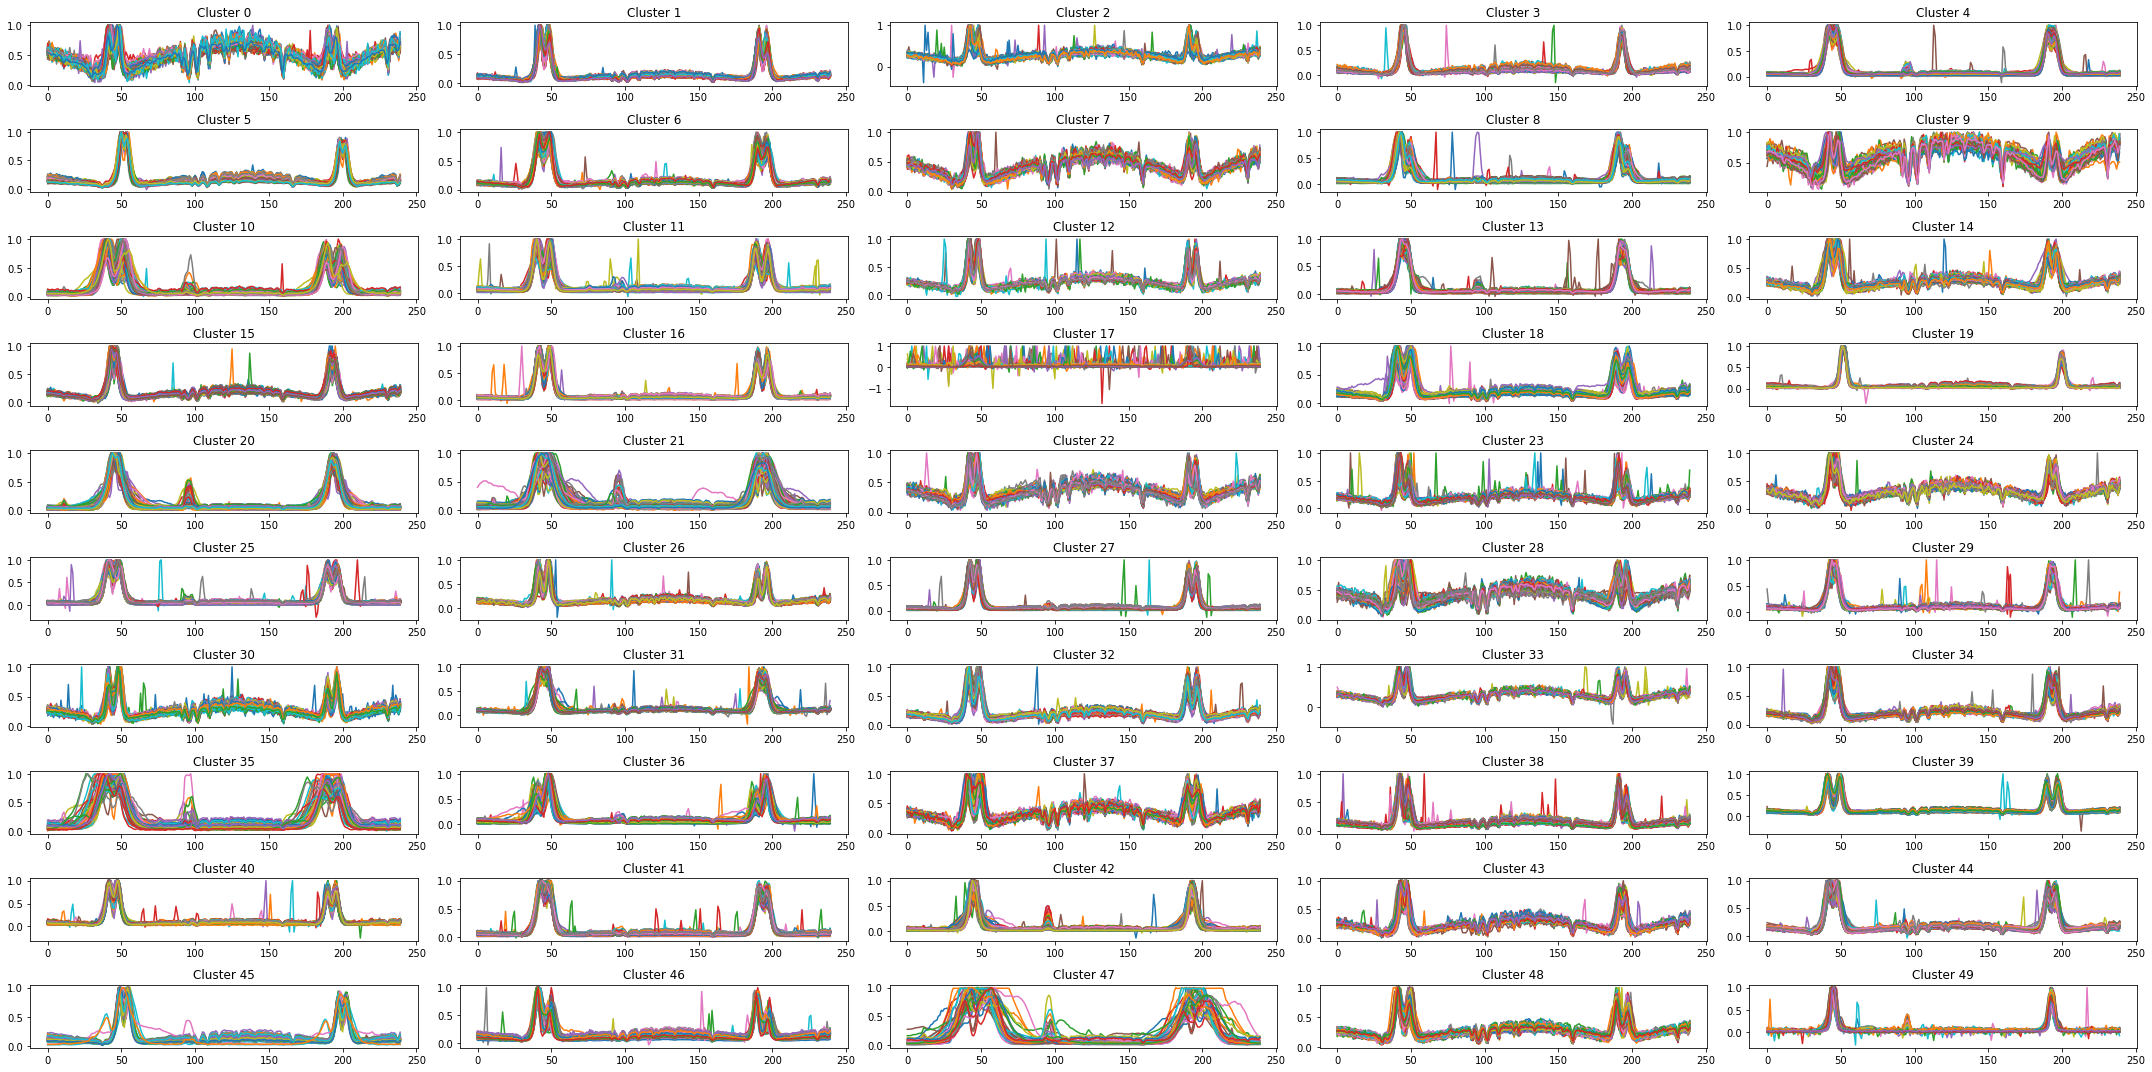

In [69]:
ncols = 5
nrows = int(k/ncols) + (0 if k % ncols == 0 else 1)
plt.figure( figsize=(nrows*3,ncols*3) )
bins = np.arange(240) 

for i in range(k):
    cluster = X_train[labels==i]
    plt.subplot( nrows, ncols, i+1 )
    plt.title( "Cluster %i"%i)
    for s in range(cluster.shape[0]):
        sample = cluster[s]
        plt.plot( bins, sample)

plt.tight_layout()